In [109]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature

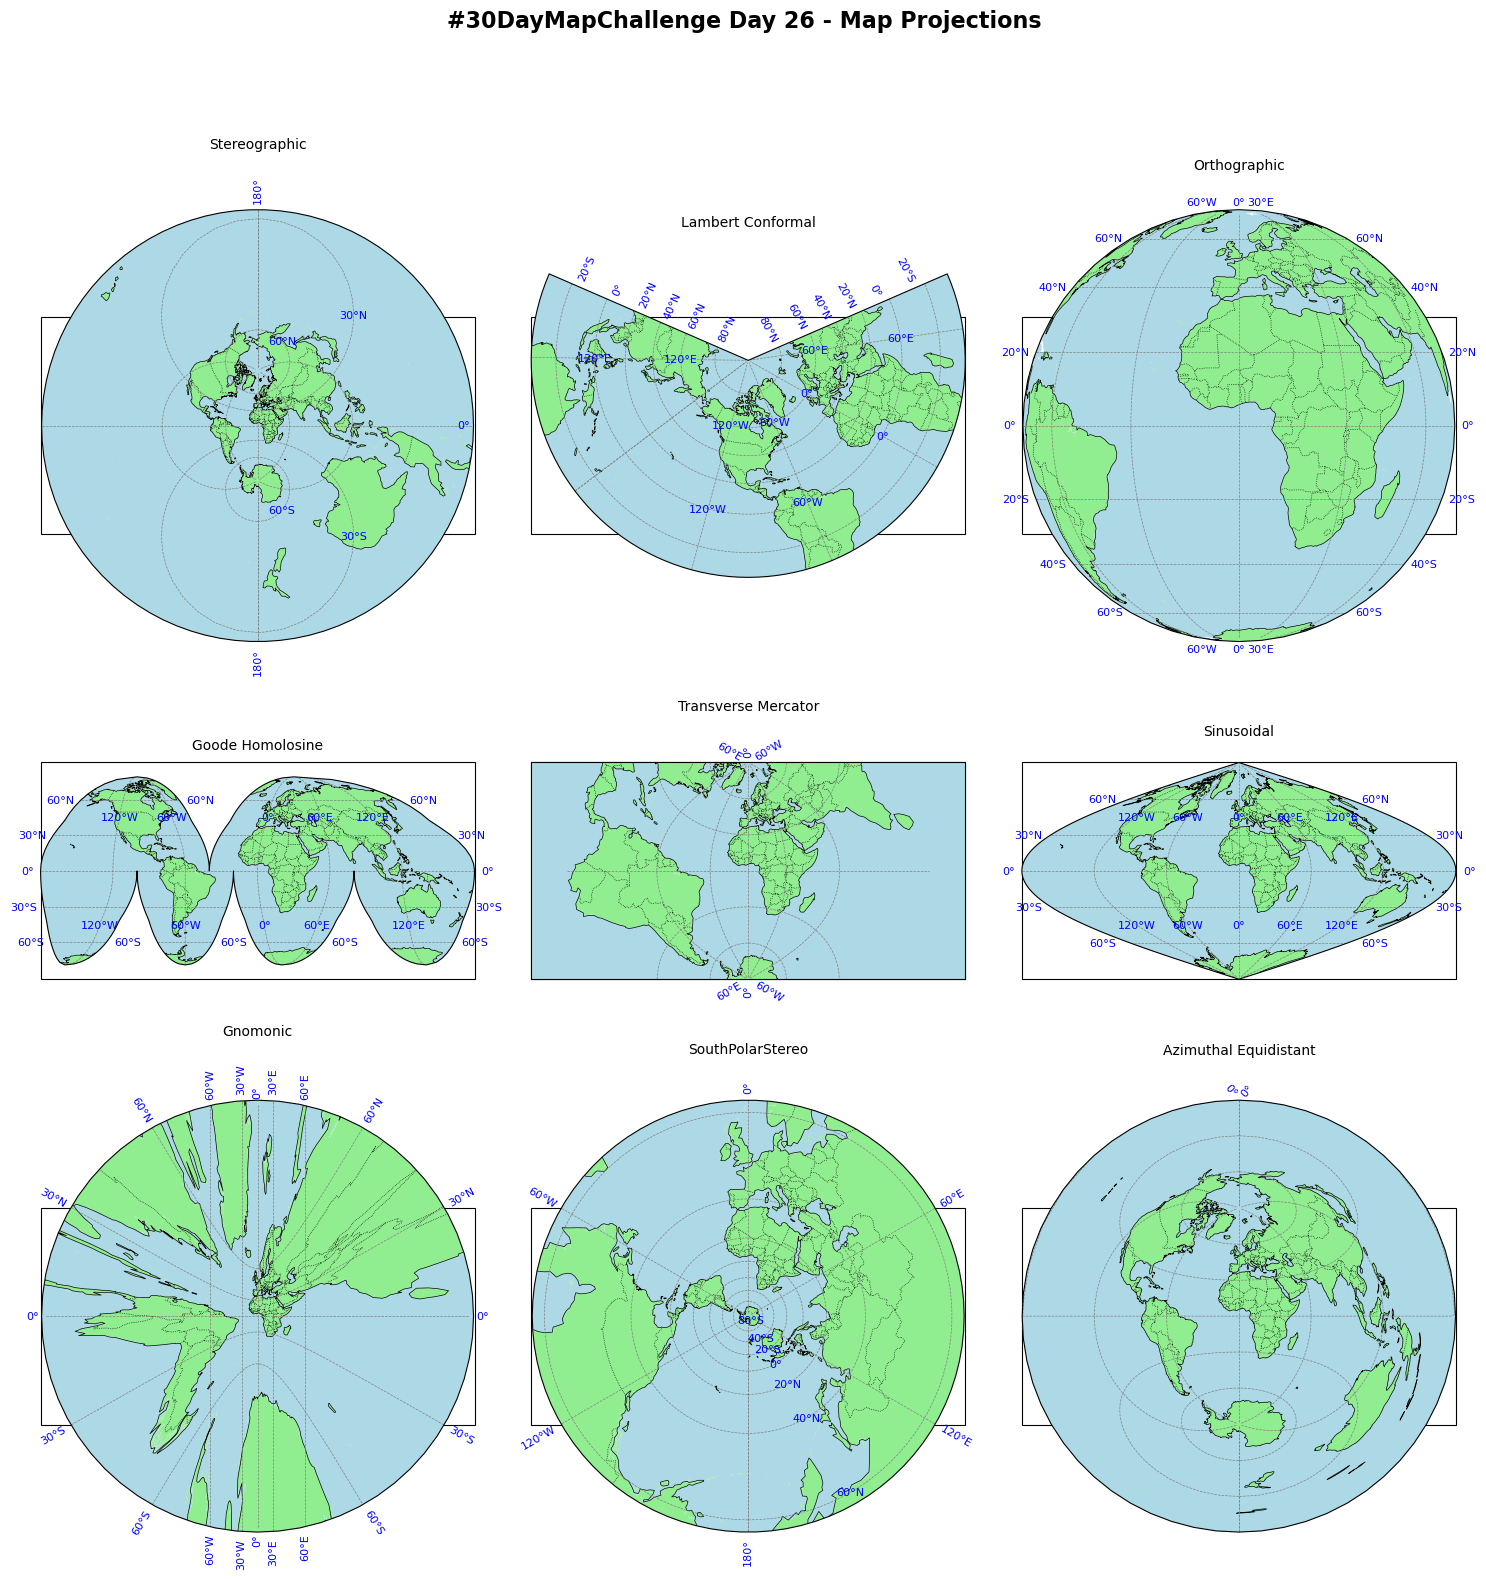

In [67]:
#list of projections to explore
#full list at https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
projections = [
    (ccrs.Stereographic(), "Stereographic"),
    (ccrs.LambertConformal(), "Lambert Conformal"),
    (ccrs.Orthographic(), "Orthographic"),
    (ccrs.InterruptedGoodeHomolosine(), "Goode Homolosine"),
    (ccrs.TransverseMercator(), "Transverse Mercator"),
    (ccrs.Sinusoidal(), "Sinusoidal"),
    (ccrs.Gnomonic(), "Gnomonic"),
    (ccrs.SouthPolarStereo(), "SouthPolarStereo"),
    (ccrs.AzimuthalEquidistant(), "Azimuthal Equidistant"),
]

#define land and ocean features
land = cfeature.NaturalEarthFeature(
    category='physical', name='land',
    scale='50m', facecolor='lightgreen'
)
ocean = cfeature.NaturalEarthFeature(
    category='physical', name='ocean',
    scale='50m', facecolor='lightblue'
)

#plot world maps using different projections
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 15),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

for ax, (proj, name) in zip(axes.flat, projections):
    ax = plt.subplot(3, 3, projections.index((proj, name)) + 1, projection=proj)
    ax.set_title(name, fontsize=10, pad=20)

    #add land and ocean with colors
    ax.add_feature(ocean)  
    ax.add_feature(land)  
    
    #add coastlines and borders
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
    
    #add gridlines with adjusted labels
    gl = ax.gridlines(draw_labels=True, color='gray', linestyle='--', linewidth=0.5)
    gl.xlabel_style = {'size': 8, 'color': 'blue'}  
    gl.ylabel_style = {'size': 8, 'color': 'blue'}

#add an overall title
fig.suptitle('#30DayMapChallenge Day 26 - Map Projections', fontsize=16, fontweight='bold', y=1.05)

#adjust layout
plt.tight_layout()

#save the figure as an image
plt.savefig("Day 26.png", bbox_inches='tight', pad_inches=0.1)

#show the image
plt.show()

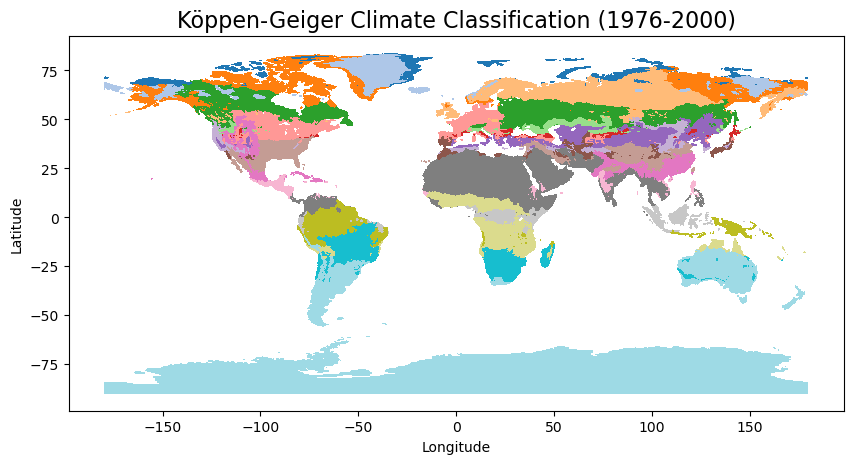

In [111]:
#load in Köppen-Geiger data
#downloaded from https://datacatalog.worldbank.org/search/dataset/0042325
gdf = gpd.read_file('c1976_2000.shp')

#plot the shapefile
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, cmap='tab20', legend=True)

#add title and labels
ax.set_title("Köppen-Geiger Climate Classification (1976-2000)", fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

#show the plot
plt.show()

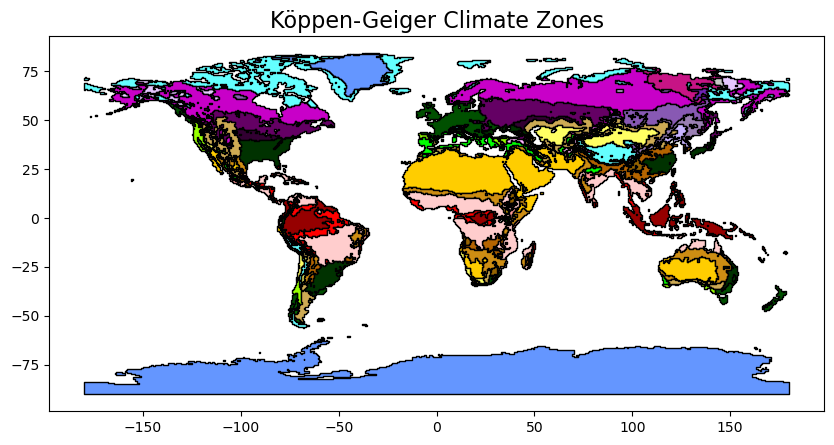

In [113]:
#prepare the mapping from GRIDCODE to Color
#https://gist.github.com/jsanz/5766a587113d092739b6#file-koppen-gridcodes-csv
color_map = {
    11: '#960000', 12: '#FF0000', 13: '#FF9999', 14: '#FFCDCD',
    21: '#FFFF64', 22: '#FFCD00', 26: '#CDAA54', 27: '#CD8D13',
    31: '#003200', 32: '#005000', 33: '#007800', 34: '#00FF00',
    35: '#96FF00', 36: '#C8FF00', 37: '#B46400', 38: '#966400',
    39: '#5A3C00', 41: '#320032', 42: '#640064', 43: '#C800C8',
    44: '#C71485', 45: '#FF6DFF', 46: '#FFB4FF', 47: '#E6C8FF',
    48: '#C8C8C8', 49: '#C8B4FF', 50: '#9A7FB3', 51: '#8859B3',
    52: '#6F24B3', 61: '#6496FF', 62: '#64FFFF'
}

#convert the color hex codes to RGBA format
color_map_rgba = {k: to_rgba(v) for k, v in color_map.items()}

#add a 'color' column based on the 'GRIDCODE' values
gdf['color'] = gdf['GRIDCODE'].map(color_map_rgba)

#plot the shapefile with the colors
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(color=gdf['color'], edgecolor='black', ax=ax)

#add a title
ax.set_title('Köppen-Geiger Climate Zones', fontsize=16)

#show the plot
plt.show()

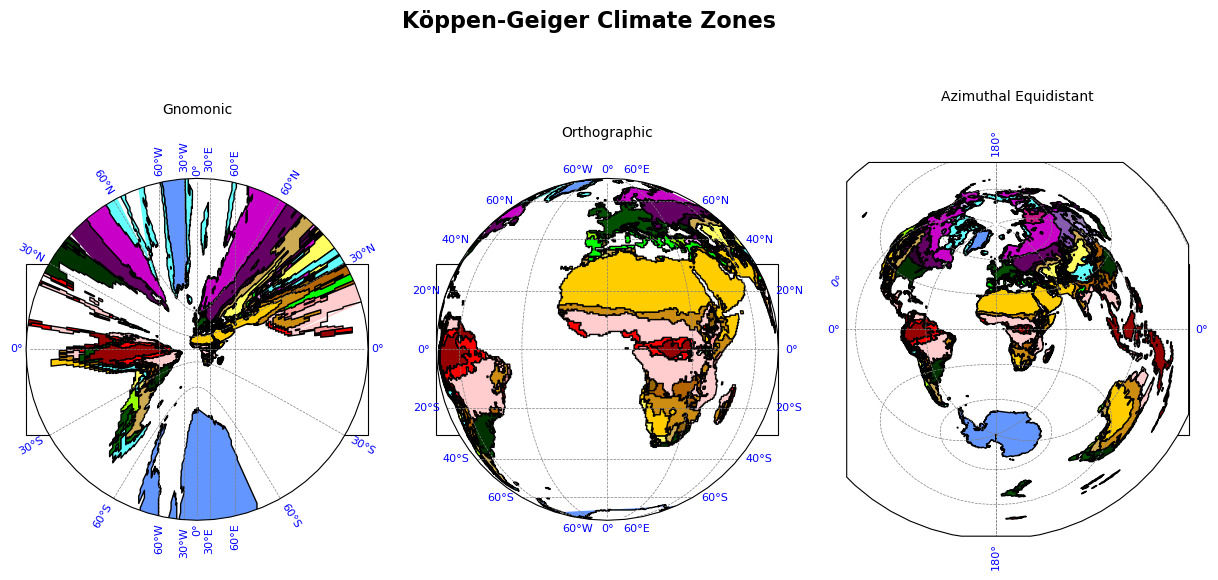

In [173]:
#list of projections to explore
projections = [
    (ccrs.Gnomonic(), "Gnomonic"),
    (ccrs.Orthographic(), "Orthographic"),
    (ccrs.AzimuthalEquidistant(), "Azimuthal Equidistant"),
]

#create the plot with a 1x3 grid of subplots
fig, axes = plt.subplots(
    nrows=1, ncols=3, figsize=(15, 7),
    subplot_kw={'projection': ccrs.PlateCarree()}  #using PlateCarree for initial layout
)

#loop through each projection and plot the Köppen-Geiger data
for ax, (proj, name) in zip(axes.flat, projections):
    ax = plt.subplot(1, 3, projections.index((proj, name)) + 1, projection=proj)

    #reproject the GeoDataFrame to match the current projection
    gdf_proj = gdf.to_crs(proj.proj4_init) if hasattr(proj, 'proj4_init') else gdf

    #plot the Köppen-Geiger data
    gdf_proj.plot(ax=ax, color=gdf_proj['color'], edgecolor='black', legend=True)

    #set the title for each projection
    ax.set_title(name, fontsize=10, pad=20)

    #add gridlines with adjusted labels
    gl = ax.gridlines(draw_labels=True, color='gray', linestyle='--', linewidth=0.5)
    gl.xlabel_style = {'size': 8, 'color': 'blue'}
    gl.ylabel_style = {'size': 8, 'color': 'blue'}

#add an overall title
fig.suptitle('Köppen-Geiger Climate Zones', fontsize=16, fontweight='bold')

#adjust layout without overlapping
plt.tight_layout

#save the figure as an image
plt.savefig("Koppen_Geiger_Projections", bbox_inches='tight', pad_inches=0.1)

#show the plot
plt.show()